<a href="https://colab.research.google.com/github/WaliMuhammadAhmad/7thSemester/blob/main/NLP/Project/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -qU langchain-mistralai tiktoken unstructured langchain_community jq langchain-core langgraph>0.2.27

In [2]:
import os
import json
import getpass
import tiktoken
from pathlib import Path
from pprint import pprint
from langchain_community.document_loaders import JSONLoader
from langchain_community.document_loaders import DirectoryLoader
from langchain_mistralai import ChatMistralAI
from langchain_core.messages import HumanMessage
from google.colab import userdata

In [3]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LangSmith')
os.environ["MISTRAL_API_KEY"] = userdata.get('MistralAPI')

In [4]:
model = ChatMistralAI(model="mistral-large-latest")

In [5]:
r= model.invoke([HumanMessage(content="Who are you?")])
r.content

'I am a language model trained by the Mistral AI team.'

In [6]:
r.response_metadata['token_usage']

{'prompt_tokens': 7, 'total_tokens': 20, 'completion_tokens': 13}

In [82]:
f = [file for file in os.listdir('./') if file.endswith('.json')]
f

['Verification and Tracking.json',
 'Services.json',
 'Location.json',
 'Home.json']

# Load JSON

In [9]:
file_path=os.path.join('./', f[0])
data = json.loads(Path(file_path).read_text())

In [10]:
# pprint(data)

In [16]:
loader = JSONLoader(
    file_path='/content/Services.json',
    jq_schema=".subcategories[]",
    content_key=".content",
    is_content_key_jq_parsable=True,
    text_content=False)

doc = loader.load()
doc

[Document(metadata={'source': '/content/Services.json', 'seq_num': 1}, page_content="[{'service_name': 'کریکٹر سرٹیفیکیٹ', 'description': 'با ہر کے ممالک جانے کے لیے، باہر کے مختلف اداروں میں ملازمت حاصل کرنے کےلیے اور وطن بدلی کے لیے پولیس کریکٹر سرٹیفیکیٹ کی ضرورت پڑتی ہے۔', 'required_documents': ['3 پاسپورٹ سایز تصاویر (ہلکے نیلے رنگ کا بیک گراوَنڈ، غیر مصدقہ)', 'شناختی کارڈ اصلی', 'شناختی کارڈ کی دو کاپیاں (گزیٹیڈ افسر سے مصدقہ)', 'اصلی پاسپورٹ', 'پاسپورٹ کی ایک کاپی (گزیٹیڈ افسر سے مصدقہ)', '50 روپیہ کا حلف نامہ (عہدیدار کمشنر سے تصدیق شدہ)', 'اختیار نامہ (اگر درخواست دہندہ ملک سے باہر ہے)'], 'processing_fee': '500 روپے', 'processing_time': '5 سرکاری دن', 'delivery_method': 'کوریئر', 'notes': 'کریکٹر سرٹیفیکیٹ صرف امیدوار کے خود آنے پر ہی جمع کرایا جاتا ہے۔ اگر امیدوار ملک سے باہر ہو تو اس کی جگہ رشتہ دار اختیار نامہ کے ساتھ درخواست دے سکتا ہے۔'}, {'service_name': 'پولیس ویریفیکیشن', 'description': 'پاکستان کے مختلف اداروں میں ملازمت کی درخواست کے لیے پولیس ریکارڈ کی عمومی تصدیق ض

In [12]:
# loader = DirectoryLoader(
#     path='./',
#     glob="*.json",
#     loader_cls=JSONLoader,
#     loader_kwargs={
#         "jq_schema": ".subcategories[]",
#         "content_key": ".content",
#         "text_content": False,
#     },
#     show_progress=True)

In [13]:
# doc = loader.load()
# doc

In [15]:
# from langchain.document_loaders.json_loader import JSONLoader

# # Path to the cleaned data file
# file_path = "/content/Cleaned Data.json"

# # Use jq schema to process the outer array and access subcategories
# loader = JSONLoader(
#     file_path=file_path,
#     jq_schema=".[].subcategories[]",  # Traverse the outer array and access subcategories
#     content_key=".content",           # Extract the content from each subcategory
#     is_content_key_jq_parsable=True,
#     text_content=False                # Indicates content is not plain text
# )

# # Load documents
# documents = loader.load()

# # Output loaded documents
# print(f"Total documents loaded: {len(documents)}")
# print("Sample document metadata:", documents[0].metadata)
# print("Sample document content:", documents[0].page_content)


# Chroma

In [17]:
!pip install chromadb langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.4 MB/s eta 0:00:

In [18]:
import chromadb
chroma_client = chromadb.Client()

In [19]:
collection = chroma_client.create_collection(name="PKM")

In [20]:
collection

Collection(name=PKM)

# mistral embeding

In [21]:
from langchain_mistralai import MistralAIEmbeddings

embeddings = MistralAIEmbeddings(model="mistral-embed")

/usr/local/lib/python3.10/dist-packages/langchain_mistralai/embeddings.py:175: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [22]:
print(embeddings.embed_query("Hello mistral!"))

[-0.00965118408203125, 0.00885772705078125, 0.035675048828125, 0.01277923583984375, 0.04656982421875, 0.052276611328125, 0.044891357421875, 0.0115509033203125, -0.0526123046875, -0.0079803466796875, -0.03326416015625, 0.050262451171875, -0.007144927978515625, -0.01480865478515625, -0.051544189453125, 0.031280517578125, 0.0147552490234375, 0.0037517547607421875, 0.01453399658203125, 0.01064300537109375, -0.0170440673828125, 0.00026488304138183594, -0.05963134765625, 0.01108551025390625, -0.043548583984375, -0.00772857666015625, -0.007633209228515625, -0.04266357421875, -0.019195556640625, -0.0288238525390625, -0.0015840530395507812, -0.0175323486328125, 0.008453369140625, -0.00023114681243896484, -0.006214141845703125, 0.0144805908203125, -0.0178375244140625, -0.0435791015625, 0.0457763671875, -0.0201873779296875, -0.023529052734375, -0.00812530517578125, -0.0307464599609375, 0.00946807861328125, -0.006633758544921875, -0.02569580078125, 0.00428009033203125, -0.03314208984375, 0.0268402

# vectore store in Chroma

In [23]:
!rm -rf ./chroma_db

In [24]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="PKM",
    embedding_function=embeddings,
    persist_directory="./chroma_db",
)

In [25]:
from uuid import uuid4

In [74]:
# len(documents)

In [75]:
# assert len(documents.page_content) == 1

In [76]:
# embeddings.embed_documents(documents[0].page_content)

In [77]:
# uuids = [str(uuid4()) for _ in range(len(documents))]

# vector_store.add_documents(documents=documents, ids=uuids)

In [29]:
uuids = [str(uuid4()) for _ in range(len(doc))]

vector_store.add_documents(documents=doc, ids=uuids)

['ebd2e02a-7227-4a66-9702-17dd915b5885']

In [30]:
query = "شہری پولیس خدمت مرکز سے ڈرایئونگ لائسنس کی تجدید کے لئے درخواست جمع کروا سکتے ہیں۔"

In [36]:
results = vector_store.similarity_search(
    query,
    k=1,
    # filter={"service_name": ""},
)
# print(results)

for res in results:
    print(f"[{res.metadata}] * {res.page_content}")

[{'seq_num': 1, 'source': '/content/Services.json'}] * [{'service_name': 'کریکٹر سرٹیفیکیٹ', 'description': 'با ہر کے ممالک جانے کے لیے، باہر کے مختلف اداروں میں ملازمت حاصل کرنے کےلیے اور وطن بدلی کے لیے پولیس کریکٹر سرٹیفیکیٹ کی ضرورت پڑتی ہے۔', 'required_documents': ['3 پاسپورٹ سایز تصاویر (ہلکے نیلے رنگ کا بیک گراوَنڈ، غیر مصدقہ)', 'شناختی کارڈ اصلی', 'شناختی کارڈ کی دو کاپیاں (گزیٹیڈ افسر سے مصدقہ)', 'اصلی پاسپورٹ', 'پاسپورٹ کی ایک کاپی (گزیٹیڈ افسر سے مصدقہ)', '50 روپیہ کا حلف نامہ (عہدیدار کمشنر سے تصدیق شدہ)', 'اختیار نامہ (اگر درخواست دہندہ ملک سے باہر ہے)'], 'processing_fee': '500 روپے', 'processing_time': '5 سرکاری دن', 'delivery_method': 'کوریئر', 'notes': 'کریکٹر سرٹیفیکیٹ صرف امیدوار کے خود آنے پر ہی جمع کرایا جاتا ہے۔ اگر امیدوار ملک سے باہر ہو تو اس کی جگہ رشتہ دار اختیار نامہ کے ساتھ درخواست دے سکتا ہے۔'}, {'service_name': 'پولیس ویریفیکیشن', 'description': 'پاکستان کے مختلف اداروں میں ملازمت کی درخواست کے لیے پولیس ریکارڈ کی عمومی تصدیق ضروری ہوتی ہے۔', 'required_docu

In [37]:
retriever = vector_store.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"k": 1, "score_threshold": 0.5}
)
retriever.invoke(query)

[Document(metadata={'seq_num': 1, 'source': '/content/Services.json'}, page_content="[{'service_name': 'کریکٹر سرٹیفیکیٹ', 'description': 'با ہر کے ممالک جانے کے لیے، باہر کے مختلف اداروں میں ملازمت حاصل کرنے کےلیے اور وطن بدلی کے لیے پولیس کریکٹر سرٹیفیکیٹ کی ضرورت پڑتی ہے۔', 'required_documents': ['3 پاسپورٹ سایز تصاویر (ہلکے نیلے رنگ کا بیک گراوَنڈ، غیر مصدقہ)', 'شناختی کارڈ اصلی', 'شناختی کارڈ کی دو کاپیاں (گزیٹیڈ افسر سے مصدقہ)', 'اصلی پاسپورٹ', 'پاسپورٹ کی ایک کاپی (گزیٹیڈ افسر سے مصدقہ)', '50 روپیہ کا حلف نامہ (عہدیدار کمشنر سے تصدیق شدہ)', 'اختیار نامہ (اگر درخواست دہندہ ملک سے باہر ہے)'], 'processing_fee': '500 روپے', 'processing_time': '5 سرکاری دن', 'delivery_method': 'کوریئر', 'notes': 'کریکٹر سرٹیفیکیٹ صرف امیدوار کے خود آنے پر ہی جمع کرایا جاتا ہے۔ اگر امیدوار ملک سے باہر ہو تو اس کی جگہ رشتہ دار اختیار نامہ کے ساتھ درخواست دے سکتا ہے۔'}, {'service_name': 'پولیس ویریفیکیشن', 'description': 'پاکستان کے مختلف اداروں میں ملازمت کی درخواست کے لیے پولیس ریکارڈ کی عمومی تصدیق ض

# chat prototype

In [49]:
assert len(doc) == 1
print(f"Total characters: {len(doc[0].page_content)}")

Total characters: 6561


In [58]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

In [52]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [53]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = model.invoke(messages)
    return {"answer": response.content}

In [54]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

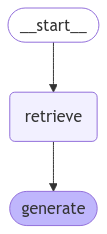

In [55]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
result = graph.invoke({"question": "کریکٹر سرٹیفیکیٹ"})

print(f'Answer: {result["answer"]}')

Answer: پولیس کریکٹر سرٹیفیکیٹ بین الاقوامی سفر، ملازمت، اور وطن بدلی کے لیے ضروری ہے۔ اس کے لیے ضروری دستاویزات میں 3 پاسپورٹ سائز تصاویر، شناختی کارڈ، اور پاسپورٹ شامل ہیں۔ فیس 500 روپے اور پروسیسنگ ٹائم 5 سرکاری دن ہے۔


In [57]:
pprint(f'Answer: {result["answer"]}')

('Answer: پولیس کریکٹر سرٹیفیکیٹ بین الاقوامی سفر، ملازمت، اور وطن بدلی کے لیے '
 'ضروری ہے۔ اس کے لیے ضروری دستاویزات میں 3 پاسپورٹ سائز تصاویر، شناختی کارڈ، '
 'اور پاسپورٹ شامل ہیں۔ فیس 500 روپے اور پروسیسنگ ٹائم 5 سرکاری دن ہے۔')




---



In [59]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)

In [60]:
from langchain_core.tools import tool


@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

In [78]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode

def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = model.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])

    return {"messages": [response]}


tools = ToolNode([retrieve])

In [80]:
def generate(state: MessagesState):
    """Generate answer."""
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = ("""
    مندرجہ ذیل سیاق و سباق کے ٹکڑوں کا استعمال کرتے ہوئے سوال کا جواب دیں۔
اگر آپ جواب نہیں جانتے تو صرف یہ کہیں کہ "مجھے معلوم نہیں"، جواب بنانے کی کوشش نہ کریں۔
ہمیشہ تین جملوں میں مختصر اور جامع جواب دیں۔
ہمیشہ جواب کے آخر میں "سوال کرنے کا شکریہ!" ضرور کہیں۔
    """
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    response = model.invoke(prompt)
    return {"messages": [response]}

In [62]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

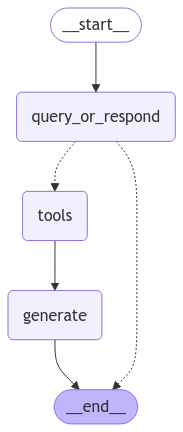

In [63]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
input_message = "کریکٹر سرٹیفیکیٹ"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

کریکٹر سرٹیفیکیٹ
================================== Ai Message ==================================

آپ کریکٹ سرٹیفیکیٹ کے بارے میں جاننا چاہتے ہیں؟ کریکٹ سرٹیفیکیٹ عام طور پر کریکٹ کھیل میں کارکردگی یا حصہ لینے پر دیا جاتا ہے۔ یہ سرٹیفیکیٹ کسی کھلاڑی کی کارکردگی کو تسلیم کرنے کے لیے دیا جاتا ہے اور اس میں کھلاڑی کا نام، ایوارڈ کی تفصیلات، اور تاریخ شامل ہوتی ہے۔

اگر آپ کو کسی خاص سرٹیفیکیٹ کی تفصیلات چاہیے ہیں، تو براہ کرم مزید معلومات فراہم کریں تاکہ میں آپ کی مدد کر سکوں۔


In [81]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

config = {"configurable": {"thread_id": "abc123"}} # random thread_id

In [71]:
for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

کریکٹر سرٹیفیکیٹ
================================== Ai Message ==================================
Tool Calls:
  retrieve (fq5Y9q3ow)
 Call ID: fq5Y9q3ow
  Args:
    query: کریکٹر سرٹیفیکیٹ


================================= Tool Message =================================
Name: retrieve

Source: {'seq_num': 1, 'source': '/content/Services.json'}
Content: [{'service_name': 'کریکٹر سرٹیفیکیٹ', 'description': 'با ہر کے ممالک جانے کے لیے، باہر کے مختلف اداروں میں ملازمت حاصل کرنے کےلیے اور وطن بدلی کے لیے پولیس کریکٹر سرٹیفیکیٹ کی ضرورت پڑتی ہے۔', 'required_documents': ['3 پاسپورٹ سایز تصاویر (ہلکے نیلے رنگ کا بیک گراوَنڈ، غیر مصدقہ)', 'شناختی کارڈ اصلی', 'شناختی کارڈ کی دو کاپیاں (گزیٹیڈ افسر سے مصدقہ)', 'اصلی پاسپورٹ', 'پاسپورٹ کی ایک کاپی (گزیٹیڈ افسر سے مصدقہ)', '50 روپیہ کا حلف نامہ (عہدیدار کمشنر سے تصدیق شدہ)', 'اختیار نامہ (اگر درخواست دہندہ ملک سے باہر ہے)'], 'processing_fee': '500 روپے', 'processing_time': '5 سرکاری دن', 'delivery_method': 'کوریئر', 'notes': 'کریکٹر سرٹیفیکیٹ صرف امیدوار کے خود آنے پر ہی جمع کرایا جاتا ہے۔ اگر امیدوار ملک سے باہر ہو تو اس کی جگہ رشتہ دار اختیار نامہ کے ساتھ درخواست دے سکتا ہے۔'}, {'service_name': 'پولیس ویریفیکیشن', 'description': 'پا



---

